In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('/content/AMZN.csv')

In [47]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [48]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [49]:
data = df[['Close']].values


In [50]:
#Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)


In [51]:
#for 60 days 1-59 and from 60 to end
X, y = [], []
for i in range(60, len(data)): X.append(data[i-60:i]); y.append(data[i])


In [52]:
X, y = np.array(X), np.array(y)


In [53]:
#Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [54]:
#LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [55]:
model = Sequential()
model.add(LSTM(50, input_shape=(60,1)))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
model.add(Dense(1))


In [57]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [58]:
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 6.5808e-04
Epoch 2/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.1023e-06
Epoch 3/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 6.6042e-06
Epoch 4/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 6.6607e-06
Epoch 5/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 5.4198e-06
Epoch 6/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 4.9684e-06
Epoch 7/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 4.4643e-06
Epoch 8/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 4.8160e-06
Epoch 9/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 4.4692e-06
Epoch 10/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 4.5409e-06


In [59]:
pred = model.predict(X_test)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [60]:
pred = scaler.inverse_transform(pred)
y_test = scaler.inverse_transform(y_test)


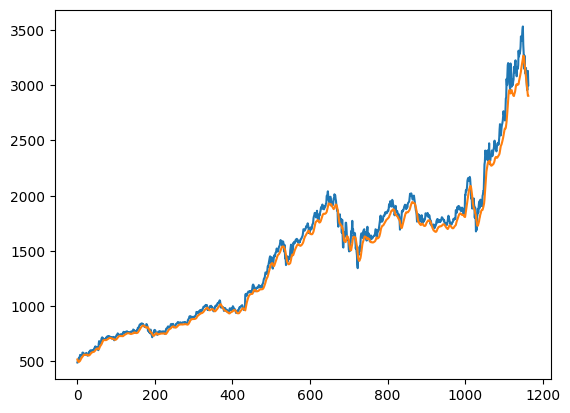

In [61]:
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual')
plt.plot(pred, label='Predicted')


/tmp/ipython-input-3797612934.py:1: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


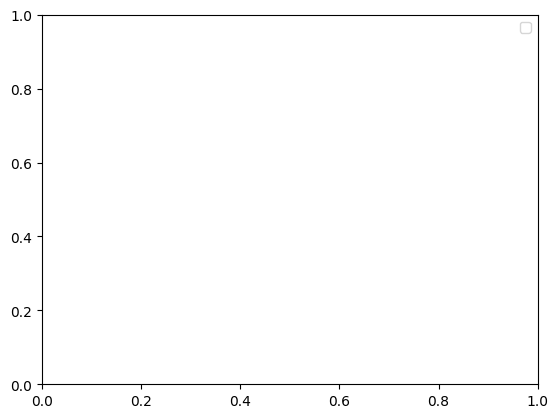

In [62]:
plt.legend()
plt.show()


#checking why got blank graph

In [63]:
y_test.shape, pred.shape


((1164, 1), (1164, 1))

In [64]:
y_test = y_test.flatten()
pred = pred.flatten()


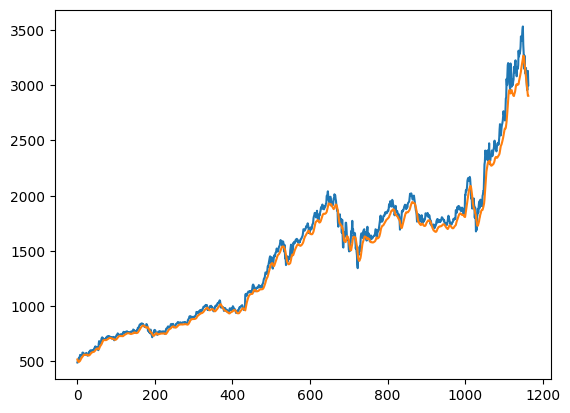

In [65]:
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual')
plt.plot(pred, label='Predicted')


/tmp/ipython-input-3797612934.py:1: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


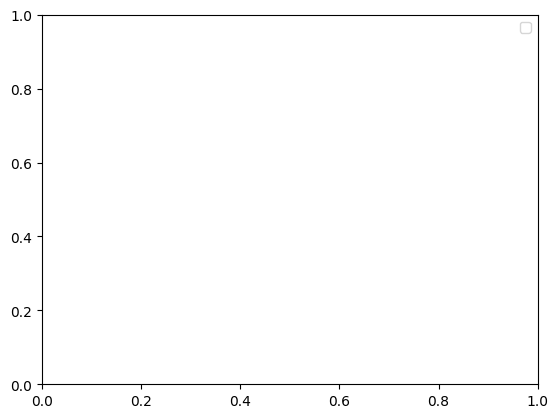

In [66]:
plt.legend()
plt.show()


In [67]:
print(type(y_test), type(pred))
print(len(y_test), len(pred))


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
1164 1164


In [68]:
y_test.min(), y_test.max()
pred.min(), pred.max()


(np.float32(495.5797), np.float32(3267.4907))

In [69]:
y_test = np.asarray(y_test, dtype=float).ravel()
pred = np.asarray(pred, dtype=float).ravel()


In [70]:
x = np.arange(len(y_test))


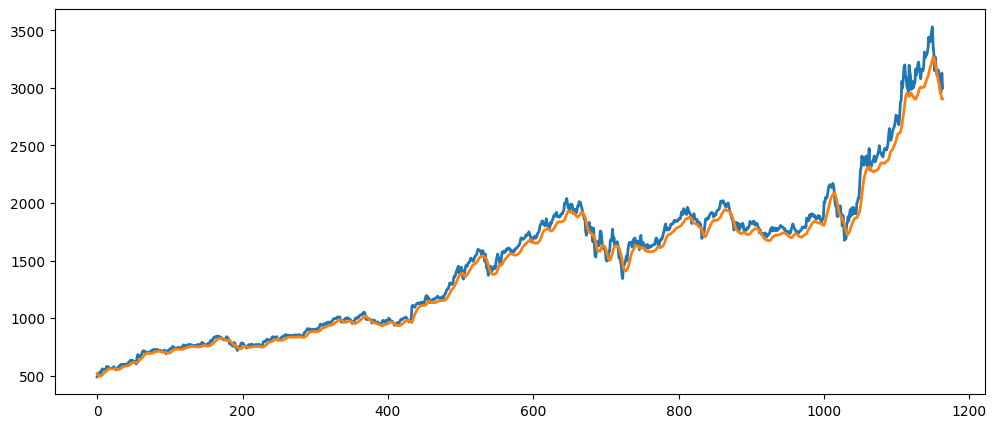

In [71]:
plt.figure(figsize=(12,5))
plt.plot(x, y_test, linewidth=2)
plt.plot(x, pred, linewidth=2)


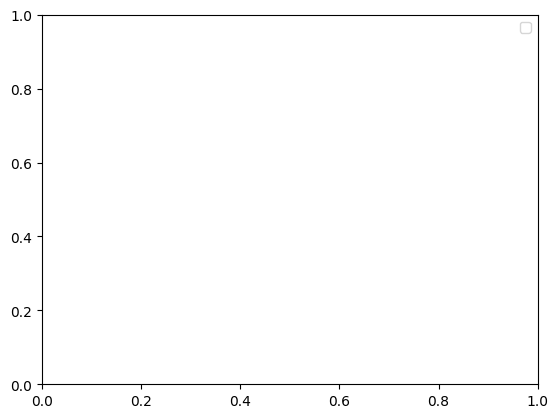

In [72]:
plt.legend(['Actual','Predicted'])
plt.show()


#Checking AGain

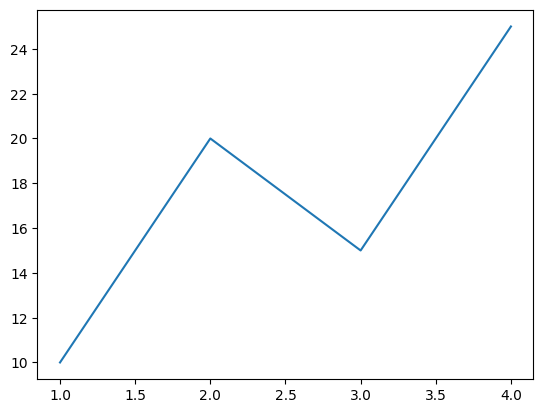

In [73]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4],[10,20,15,25])
plt.show()


In [74]:
print(y_test[:10])
print(pred[:10])


[490.480011 503.820007 507.079987 521.099976 534.099976 525.
 534.900024 559.5      552.940002 554.039978]
[517.67175293 506.77612305 499.97543335 495.84844971 495.57971191
 498.68740845 501.44064331 505.86135864 513.88665771 520.86413574]


In [75]:
%matplotlib inline
plt.close('all')


In [76]:
y_plot = list(map(float, y_test))
p_plot = list(map(float, pred))


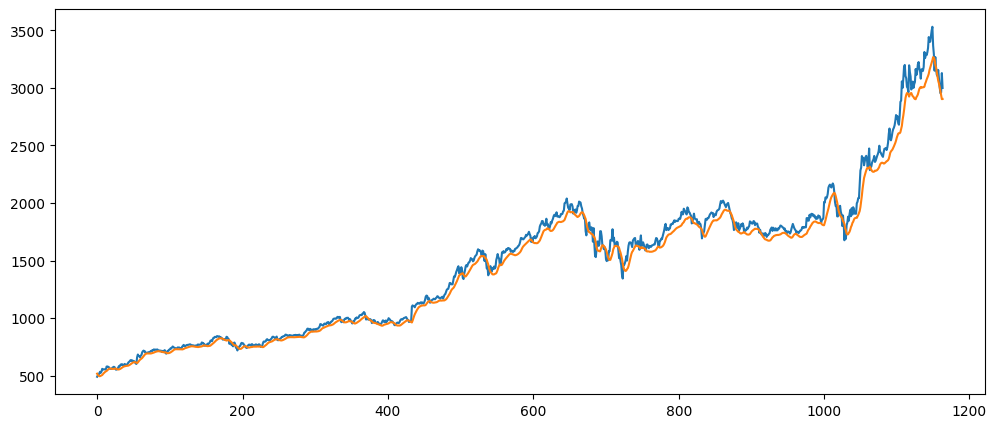

In [77]:
plt.figure(figsize=(12,5))
plt.plot(y_plot)
plt.plot(p_plot)


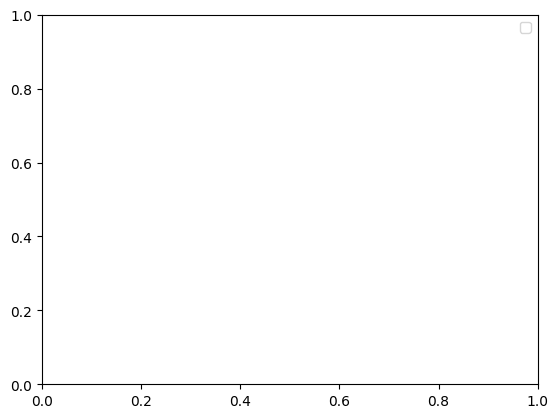

In [78]:
plt.legend(['Actual','Predicted'])
plt.show()


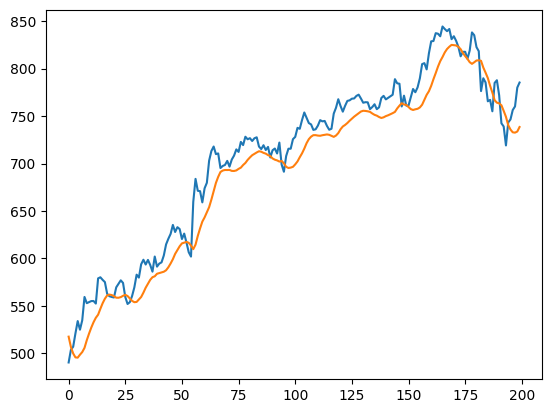

In [79]:
import matplotlib.pyplot as plt
plt.plot(y_test[:200]); plt.plot(pred[:200])
plt.savefig("stock_plot.png")


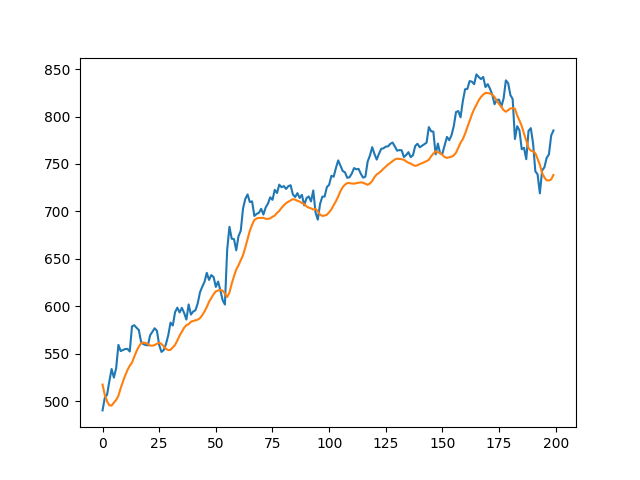

In [80]:
from PIL import Image
display(Image.open("stock_plot.png"))


In [81]:
import pandas as pd
pd.DataFrame({"Actual": y_test[:10], "Predicted": pred[:10]})


,Actual,Predicted
0,490.480011,517.671753
1,503.820007,506.776123
2,507.079987,499.975433
3,521.099976,495.848450
4,534.099976,495.579712
5,525.000000,498.687408
6,534.900024,501.440643
7,559.500000,505.861359
8,552.940002,513.886658
9,554.039978,520.864136


<Axes: >

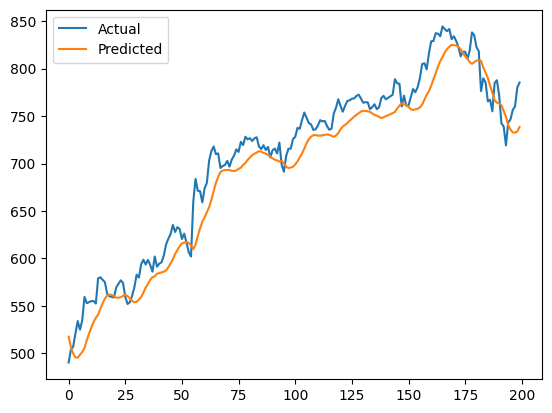

In [82]:
pd.DataFrame({"Actual": y_test, "Predicted": pred}).head(200).plot()


In [83]:
#Get last 60 days
last_60 = data[-60:]
last_60 = last_60.reshape(1,60,1)


In [84]:
next_day = model.predict(last_60)
next_day = scaler.inverse_transform(next_day)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [85]:
print("Predicted next-day price:", next_day[0][0])


Predicted next-day price: 2888.665


In [86]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, pred))


np.float64(78.67995206358171)